In [8]:
import sys
import numpy
from matplotlib import pyplot
sys.path.append("../../../beam_perturbations/code/tile_beam_perturbations/")
sys.path.append("../../corrcal2")

from radiotelescope import RadioTelescope
from corrcal2 import make_uv_grid

In [10]:
shape = 'square'
extent= 10
number_antennas = 4
x_center = 0
y_center = 0


frequency_channels = numpy.array([150])*1e6


In [17]:
scalefactors = numpy.linspace(1, 20, 20)
redundancy = numpy.zeros_like(scalefactors)
counter = 0
for i in scalefactors:
    array_parameters = [shape, extent*i, number_antennas*i, x_center, y_center]
    telescope = RadioTelescope(load= False, shape = array_parameters, frequency_channels = frequency_channels)
    
    u = telescope.baseline_table.u_coordinates
    v = telescope.baseline_table.v_coordinates
    
    ii, groups_indices, conjugates_flags = make_uv_grid(u,v)
    
    redundancy[counter] = len(groups_indices)/len(u)
    
    counter +=1

    
    
    


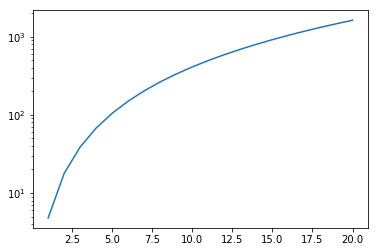

In [23]:
pyplot.semilogy(scalefactors, 1/redundancy)
pyplot.show()